# 영화 평점 및 리뷰 분석

#1.웹크롤링을 통하여 관심주제에 대한 데이터를 수집하고 수집한 내용과 코드 설명을 병행하여 제시하세요.


###영화 '강릉' 에대한 평점과 리뷰 분석

영화 리뷰에 대한 크롤링을 하려 했는데 크롤링이 잘 안되었습니다.

네이버 영화의 로봇 배제기준을 확인해 보면 다음과 같습니다.

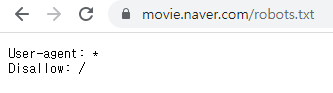

네이버 영화의 경우 크롤링이 Disallow 인 것을 확인하였습니다.

구글링을 하던 중 영화의 리뷰만 볼 수 있는 주소를 찾았습니다. 
(이는 크롤링 가능했습니다.)

영화 주소.PNG

위의 주소에서 '208530'의 숫자를 다른 영화의 주소 숫자를 넣면 그 영화의 리뷰를볼수 있습니다.

###크롤링

In [ ]:
import requests
r = requests.get('https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=208530&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page=')
r.encoding

'UTF-8'

In [ ]:
# 필요한 라이브러리 선언
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd #데이터 프레임

In [ ]:
#영화 페이지 (공통점 맨뒤 page 뒤에 숫자가 바뀜)
html = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=208530&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page='

#한 페이지당 리뷰가 10개씩 있고, 리뷰를 나타내는 것이 '_filtered_ment_'이다, 뒤에 숫자가 하나씩 증가하게 되며 바뀐다.
reivew = '_filtered_ment_'

# '_filtered_ment_'뒤에 숫자 하나씩 들어올 데이터를 넣을 리스트
reivews = []

#마지막 review와 rating 데이터를 넣을 리스트
reivew_rating_data = []

#페이지를 바꿀때 숫자 하나씩 증가하기에 for문을 사용하여 100 페이지를 가져옴.
for page in range(100):
    htmls = html+str(page+1)  # 페이지가 1 ~ 100까지 변환됨.
    res = requests.get(htmls)

    #bs로 parsing 해줌
    soup = bs(res.content,'html.parser')
    
    #rating 리스트에 rating 담기
    rating = []
    scores = soup.find_all('div','star_score') #find_all 태그가 여러 개 있을 경우 해당하는 태그를 한꺼번에 가져오는 함수
    for score in scores:
        rating.append(score.get_text()) #get_text() 그리고 해당 태그와 그 하위 태그에 입력된 모든 텍스트 갑을 가져오는 함수
    
    #10개의 리뷰 하나씩 추가
    for i in range(10):
        reivews.append(reivew+str(i)) #뒤에 숫자 를 하나씩 올려 한 페이지의 리뷰 내용 다 리스트에 추가.

    #reivew_data dp reivew데이터 넣기
    reivew_data = []    
    for id in reivews:    
        reivew_data.append(soup.find('span',{'id':id}).get_text())

    #zip함수를 사용하여 rating과 reivew를 짝지어 리스트에 하나씩 추가,
    for score, text in zip(rating, reivew_data):
        reivew_rating_data.append({'Rating': score.strip(), 'Reivew': text.strip()}) #strip() 문자열의 '맨앞'과, '맨뒤' 의 whitespace가 제거가 된다
        
# 데이터 프레임 형식으로 확인
df = pd.DataFrame(reivew_rating_data)
df

,Rating,Reivew
0,8,유오성이 찐이다..개멋있음
1,7,몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네...
2,1,영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. ...
3,2,무슨 내용이니? 하..
4,1,0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 ...
...,...,...
995,4,다 된 영화에 장혁 뿌리기
996,2,그넘에 깡패 ㅅㅂ 진짜 ...
997,2,뭐이나 이게.. 뭐이야?
998,2,뭔 칼질하는거 보여주려고 만든 영화네. 재미도 하나 없고.


In [ ]:
#데이터 프레임 저장
df.to_csv('moviekanglung.csv',index=True)

# 2.Konlpy 또는 정규표현식(re) 라이브러리를 이용하여 위에서 수집한 택스트 데이터에 대하여 전처리를 하고 적용한 절차와 코드를 설명하세요. 

###데이터 정리

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 구글드라이브 영화자료 불러와서 사용
df = pd.read_csv('/content/drive/MyDrive/감성분석/기말고사/moviekanglung.csv', index_col=False)[['Rating','Reivew']]
df

,Rating,Reivew
0,8,유오성이 찐이다..개멋있음
1,7,몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네...
2,1,영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. ...
3,2,무슨 내용이니? 하..
4,1,0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 ...
...,...,...
995,4,다 된 영화에 장혁 뿌리기
996,2,그넘에 깡패 ㅅㅂ 진짜 ...
997,2,뭐이나 이게.. 뭐이야?
998,2,뭔 칼질하는거 보여주려고 만든 영화네. 재미도 하나 없고.


In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 한글형태소 분석기 + Mecab 설치 : 2분 정도 소요
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 55.1 MB/s 
     |████████████████████████████████| 448 kB 44.4 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/

In [ ]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

10    293
1     274
2     180
4      96
6      61
8      29
7      23
5      18
9      14
3      12
Name: Rating, dtype: int64


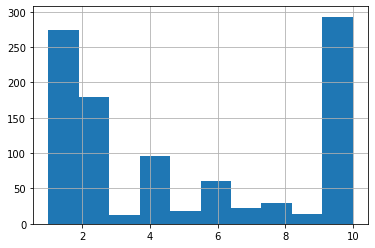

In [ ]:
# 점수별 현황
print(df['Rating'].value_counts())
df['Rating'].hist()

In [ ]:
# 점수를 기준으로 긍정(8-10)과 부정(1-7)으로 변환
def rating_to_label(rating):
    if rating > 7:
        return 1
    else:
        return 0
    
df['y'] = df['Rating'].apply(lambda x: rating_to_label(x))

In [ ]:
# 긍정 및 부정평가 댓글 수
df["y"].value_counts()

0    664
1    336
Name: y, dtype: int64

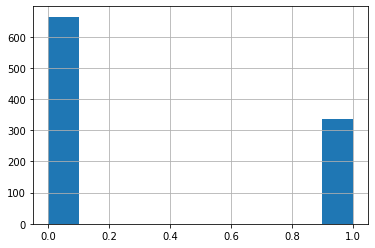

In [ ]:
df['y'].hist()

###konlpy 사용한 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  1000 non-null   int64 
 1   Reivew  985 non-null    object
 2   y       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [ ]:
#결측값 있는 행 제거, 결측값 있는 행 제거
df = df.dropna()
df

,Rating,Reivew,y
0,8,유오성이 찐이다..개멋있음,1
1,7,몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네...,0
2,1,영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. ...,0
3,2,무슨 내용이니? 하..,0
4,1,0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 ...,0
...,...,...,...
995,4,다 된 영화에 장혁 뿌리기,0
996,2,그넘에 깡패 ㅅㅂ 진짜 ...,0
997,2,뭐이나 이게.. 뭐이야?,0
998,2,뭔 칼질하는거 보여주려고 만든 영화네. 재미도 하나 없고.,0


In [ ]:
df.to_csv('rep_movie',index=True)

In [ ]:
# 구글드라이브 영화자료 불러와서 사용
df = pd.read_csv('/content/rep_movie', index_col=False)[['Rating','Reivew','y']]
df

,Rating,Reivew,y
0,8,유오성이 찐이다..개멋있음,1
1,7,몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네...,0
2,1,영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. ...,0
3,2,무슨 내용이니? 하..,0
4,1,0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 ...,0
...,...,...,...
980,4,다 된 영화에 장혁 뿌리기,0
981,2,그넘에 깡패 ㅅㅂ 진짜 ...,0
982,2,뭐이나 이게.. 뭐이야?,0
983,2,뭔 칼질하는거 보여주려고 만든 영화네. 재미도 하나 없고.,0


다시 저장한 이유가 밑의 info를 보면 이제서야 Range index가 985가 된 것을 확인할 수있다. + 결츨값 있는 행을 제거 해 주어 평점과 y도 985개로 맞추어 주었다. (그냥 하니 진행중 에러가 났다..찾아보니 여기문제..)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  985 non-null    int64 
 1   Reivew  985 non-null    object
 2   y       985 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.2+ KB


In [ ]:
# 한글 불용어 사전 다운
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]
# 형태 조정, 특별한 용어 추가 불용어 
stopwords=[x[0]  for x in stopwords]
stopwords[:10]

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해']

In [ ]:
# stopwords 추가 
movie_stopwords = ['-', '~', '영화', '장혁', '유오성', '역시', '그냥', '진짜']
for word in movie_stopwords:
    stopwords.append(word)
print(stopwords)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

In [ ]:
# df로 말뭉치로 만들면서 doc0은 부정, doc1은 긍정인 두개의 문서로 만듬
import konlpy
# tagger = konlpy.tag.Mecab()
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]

for i, sentence in enumerate(df['Reivew']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords] # 불용어 제거
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])

['개멋', '몰입 이민석 캐릭터 이유 가지 이해 인간 욕심 건가', '중간 댓글 알바 이도 강원도 사투리 내내 몰입 방해', '내용', '정말 분위기 계속 소리 댓글알바 천지 만듭 한국']
[['개멋'], ['몰입', '이민석', '캐릭터', '이유', '가지', '이해', '인간', '욕심', '건가'], ['중간', '댓글', '알바', '이도', '강원도', '사투리', '내내', '몰입', '방해'], ['내용'], ['정말', '분위기', '계속', '소리', '댓글알바', '천지', '만듭', '한국']]


# 3.긍정과 부정에 대한 워드크라우딩 결과를 비교 분석, wordcloud 라이브러리로 시각화하여 결과를 설명하세요.

###EDA

In [ ]:
# 긍정 평가와 부정평가 토큰을 분리하여 저장 
print(df[:5])
print(df.loc[df['y']==0,][:5])
tokens_p, tokens_n = [],[]
for i, token in enumerate(tokens):
  # if i>5:
  #   break
  if df['y'].values[i]== 1:  # 주의 : df['y'][i] 값을 사용하면 기존 index가 참조되어서 값이 다름
    tokens_p.append(token)
  else :
    tokens_n.append(token)

print(tokens_p)
print(tokens_n)

   Rating                                             Reivew  y
0       8                                     유오성이 찐이다..개멋있음  1
1       7  몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네...  0
2       1  영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. ...  0
3       2                                      무슨 내용이니?  하..  0
4       1  0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 ...  0
   Rating                                             Reivew  y
1       7  몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네...  0
2       1  영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. ...  0
3       2                                      무슨 내용이니?  하..  0
4       1  0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 ...  0
6       1                                    이딴걸보느니 내발가락을빨겠다  0
[['개멋'], ['배우', '연기'], ['열정', '심장'], ['초적', '한국', '느와르'], ['배우', '몰입', '재미나'], ['배우', '연기', '결말', '기존', '느와르', '느낌', '해바라기', '스타일'], ['범죄', '액션', '아르', '보고'], ['배우', '연기', '형님', '스토리', '쫀쫀해', '강추'], ['배우'], ['역대', '신세계'], ['배우', '몰입

In [ ]:
# counter 함수에 넣기위한 전처리 : 토큰단위 리스트로
corpus_n, corpus_p = [], []
for token in tokens_p:
  corpus_p.append(' '.join(token))
for token in tokens_n:
  corpus_n.append(' '.join(token))
# 모든 리뷰를 긍정 부정 하나의 corpus로 합치기 
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
print(corpus_p1)

['개멋', '배우', '연기', '열정', '심장', '초적', '한국', '느와르', '배우', '몰입', '재미나', '배우', '연기', '결말', '기존', '느와르', '느낌', '해바라기', '스타일', '범죄', '액션', '아르', '보고', '배우', '연기', '형님', '스토리', '쫀쫀해', '강추', '배우', '역대', '신세계', '배우', '몰입도', '영상', '미도', '위드', '코로나', '이후', '한국영', '상영', '팝콘', '타격', '강릉', '올해', '최고', '대박', '위드', '코로나', '존잼', '진심', '꼭바바', '추천', '대박', '여자', '대박', '간만', '연기력', '간만', '극장', '만족도', '최상', '배우', '연기', '개멋', '느와르', '장르', '사실', '정도', '장르', '계속', '작품', '고마', '따름', '이건', '사람', '사람', '연출', '연기', '평점', '정말', '조합', '극장', '아르', '느와르', '재질', '연기', '몰입', '연기', '간만', '범죄', '느와르', '보고', '마지막', '전율', '여운', '인상', '남자', '평점', '극장', '몰입', '이형은', '최고', '배우', '케미', '완전', '연기', '느와르', '액션', '고민', '배우', '연기', '만족', '중후', '몰입도', '정통', '느와르', '로서', '마초', '몰입', '인생', '느와르', '추가', '배우', '연기', '말기', '전형', '스토리', '배우', '간지', '전반', '킬링타임', '가끔', '범죄', '도시', '액션', '범죄', '도시', '느낌', '액션', '잔인함', '신세계', '셧다', '충분', '액션', '카리스마', '남자', '냄새', '물씬', '액션', '간만', '느와르', '만난', '한국', '느와르', '개존잼', '연기', '완전', '한국', '아르', '죽지'

In [ ]:
# 빈도 탐색
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))

[('연기', 87), ('배우', 63), ('느와르', 55), ('최고', 28), ('액션', 22), ('스토리', 22), ('강릉', 21), ('간만', 20), ('대박', 18), ('연기력', 14)]
[('스토리', 111), ('배우', 100), ('연기', 77), ('강릉', 51), ('사투리', 41), ('감독', 41), ('개연', 40), ('담배', 39), ('최악', 39), ('액션', 38)]


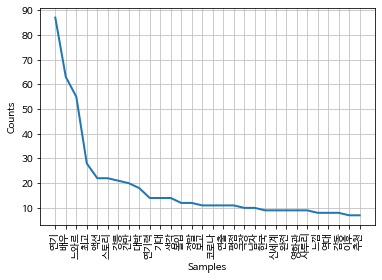

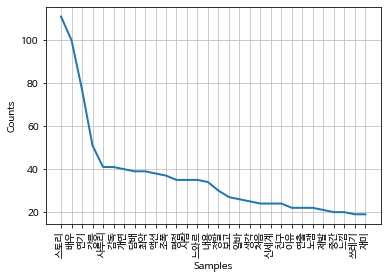

In [ ]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(corpus_p1)
neg = nltk.Text(corpus_n1)
plt.rc('font', family='NanumBarunGothic') 

plt.figure(1)
pos.plot(30)

plt.figure(2)
neg.plot(30)
plt.show()

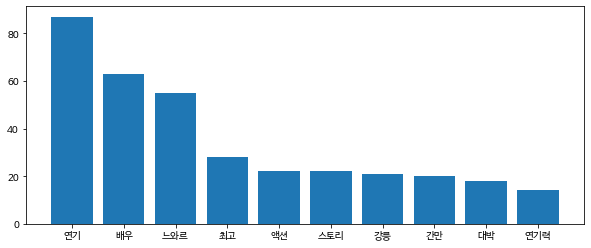

In [ ]:
top_10 = counter_p.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

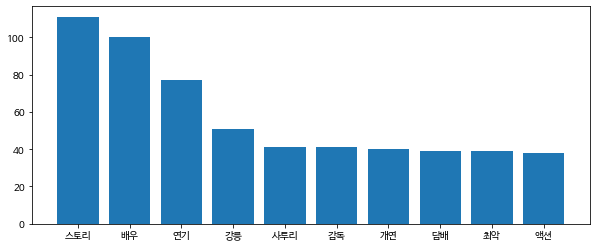

In [ ]:
top_10 = counter_n.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

In [ ]:
# DTM 구하기, corpus 문서단위 * 단어사전 1439개 매트릭스 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

(985, 1433)


,개멋,가지,건가,몰입,욕심,이민석,이유,이해,인간,캐릭터,강원도,내내,댓글,방해,사투리,알바,이도,중간,내용,계속,댓글알바,만듭,분위기,소리,정말,천지,한국,배우,연기,발가락,심장,열정,감명,시나리오,스토리,감독,강릉,개연,결말,배경,...,막타,무협,장혁특유,은퇴,기본,년도,양산,이오,부리면,주제가,방식,사용,찍엇어야,필름,여행,가라,갓파더,라스트,안감,개돼지,국민,급감,망인,초점,개차반,소환,와중,치중,타겟,온갖,상관,평창,강정,로스,모만,올레,왜그러지,강의,무덤,영어
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

(985, 1433)


,개멋,가지,건가,몰입,욕심,이민석,이유,이해,인간,캐릭터,강원도,내내,댓글,방해,사투리,알바,이도,중간,내용,계속,댓글알바,만듭,분위기,소리,정말,천지,한국,배우,연기,발가락,심장,열정,감명,시나리오,스토리,감독,강릉,개연,결말,배경,...,막타,무협,장혁특유,은퇴,기본,년도,양산,이오,부리면,주제가,방식,사용,찍엇어야,필름,여행,가라,갓파더,라스트,안감,개돼지,국민,급감,망인,초점,개차반,소환,와중,치중,타겟,온갖,상관,평창,강정,로스,모만,올레,왜그러지,강의,무덤,영어
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.336571,0.368239,0.264537,0.355612,0.384518,0.280066,0.329015,0.355612,0.30607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.289837,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.297763,0.346648,0.330381,0.421294,0.253394,0.287406,0.421294,0.310205,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.342192,0.364021,0.440695,0.34864,0.326134,0.255835,0.415879,0.299769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
982,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000

변환 후 985*1435 matrix가 출력됩니다. 여기서

한 행(row)은 한 리뷰를 의미하고

한 열(column)은 한 단어를 의미합니다.

In [ ]:
# id_to_word
print(vector.vocabulary_)
id_to_word = {v: k for k, v in vector.vocabulary_.items()}
print(id_to_word)
print(id_to_word[10])

{'개멋': 0, '가지': 1, '건가': 2, '몰입': 3, '욕심': 4, '이민석': 5, '이유': 6, '이해': 7, '인간': 8, '캐릭터': 9, '강원도': 10, '내내': 11, '댓글': 12, '방해': 13, '사투리': 14, '알바': 15, '이도': 16, '중간': 17, '내용': 18, '계속': 19, '댓글알바': 20, '만듭': 21, '분위기': 22, '소리': 23, '정말': 24, '천지': 25, '한국': 26, '배우': 27, '연기': 28, '발가락': 29, '심장': 30, '열정': 31, '감명': 32, '시나리오': 33, '스토리': 34, '감독': 35, '강릉': 36, '개연': 37, '결말': 38, '배경': 39, '부족함': 40, '상미': 41, '수록': 42, '연출': 43, '예상': 44, '전개도': 45, '진행': 46, '초반': 47, '후반': 48, '느와르': 49, '초적': 50, '그거': 51, '리조트': 52, '쟁탈전': 53, '긴장감': 54, '다스': 55, '웃음': 56, '토리': 57, '저런': 58, '도중': 59, '재미나': 60, '기존': 61, '느낌': 62, '스타일': 63, '해바라기': 64, '범죄': 65, '보고': 66, '아르': 67, '액션': 68, '개봉일': 69, '갑자기': 70, '검객': 71, '기대': 72, '사시미': 73, '서사': 74, '개봉': 75, '대한민국': 76, '강추': 77, '쫀쫀해': 78, '형님': 79, '보기': 80, '처음': 81, '한숨': 82, '제발': 83, '감성': 84, '대치': 85, '덕분': 86, '생각': 87, '포스터': 88, '녹음': 89, '병인': 90, '분한': 91, '패인': 92, '핵빛': 93, '각목': 94, '고작': 95, '기절': 96, '깡패': 97, '

###wordcloud

In [ ]:
# LDA 모형 적합, g_dictionary 사전 만들고, g_corpus(word, count)로 정리하고, ldamodel 객체 생성 (토픽2)
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=2, passes=15)
print(ldamodel.print_topics())

[(0, '0.026*"스토리" + 0.019*"느와르" + 0.015*"배우" + 0.014*"강릉" + 0.014*"최악" + 0.014*"연기" + 0.013*"담배" + 0.009*"친구" + 0.009*"내용" + 0.009*"감독"'), (1, '0.038*"연기" + 0.037*"배우" + 0.019*"스토리" + 0.013*"액션" + 0.013*"조폭" + 0.012*"사투리" + 0.012*"보고" + 0.011*"느와르" + 0.010*"평점" + 0.010*"개연"')]


In [ ]:
# 문서별 주요 토픽과 키워드 정리 함수 정의
def format_topics_sentences(ldamodel=None, g_corpus=g_corpus, tokens=tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[g_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['주요토픽', '토픽 기여도', '주요 토픽 키워드']

    # Add original text to the end of the output
    contents = pd.Series(tokens)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
# 문서별 토픽정리 
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, g_corpus=g_corpus, tokens=tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['문서번호', '주요토픽', '토픽 기여도', '키워드', '토큰']
df_dominant_topic

,문서번호,주요토픽,토픽 기여도,키워드,토큰
0,0,0.0,0.7453,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독",[개멋]
1,1,0.0,0.7716,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독","[몰입, 이민석, 캐릭터, 이유, 가지, 이해, 인간, 욕심, 건가]"
2,2,0.0,0.6249,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독","[중간, 댓글, 알바, 이도, 강원도, 사투리, 내내, 몰입, 방해]"
3,3,0.0,0.7076,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독",[내용]
4,4,0.0,0.9112,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독","[정말, 분위기, 계속, 소리, 댓글알바, 천지, 만듭, 한국]"
...,...,...,...,...,...
980,980,0.0,0.5000,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독",[]
981,981,0.0,0.7483,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독",[깡패]
982,982,0.0,0.5000,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독",[]
983,983,0.0,0.7932,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독","[칼질, 재미]"


In [ ]:
# 토픽별 키워드와 관련 토큰 정리
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('주요토픽')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['토픽 기여도'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['토픽번호', "토픽 기여도", "키워드", "관련 토큰"]

# Show
sent_topics_sorteddf_mallet.head(10)

,토픽번호,토픽 기여도,키워드,관련 토큰
0,0.0,0.9687,"스토리, 느와르, 배우, 강릉, 최악, 연기, 담배, 친구, 내용, 감독","[기승, 전결, 래야, 기기, 기결, 바다, 존나, 칼빵, 담배, 피고, 칼빵, 담배, 피고, 강릉, 홍보, 목적, 제작, 해도, 캐릭터, 서사]"
1,1.0,0.9729,"연기, 배우, 스토리, 액션, 조폭, 사투리, 보고, 느와르, 평점, 개연","[유행, 조폭, 느와르, 물의, 재탕, 뭔가, 강릉, 바다, 낭만, 조폭, 배반, 물든, 악귀, 과정, 그린, 감정, 이입, 맥락, 잔뜩, 평작]"


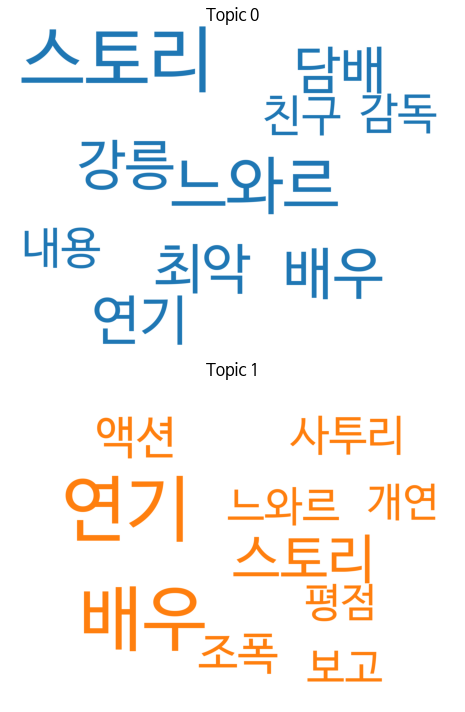

In [ ]:
# 토픽별 워드크라우딩

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
cloud = WordCloud(background_color='white',
                  font_path=fontpath,
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 1, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
# Topic 0 : 부정 / Topic1 : 긍정

# 4.전처리 결과를 이용하여 로지스틱 회귀분석 또는 딥러닝에 의한 분류분석을 하고 해당 코딩과 결과에 대하여 설명하세요. 

###데이터 준비

독립변수 X 는 tf_idf 행렬

종속변수 y 는 0 또는 1 인 벡터

In [ ]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

0    659
1    326
Name: y, dtype: int64

In [ ]:
# 원천 데이터 데이터 프레임  
df.head()

,Rating,Reivew,y
0,8,유오성이 찐이다..개멋있음,1
1,7,몰입감은 좋았으나 이민석이라는 캐릭터가 왜 어떤 이유로 끝가지 가는지 이해가 안되네요 그저 인간의 욕심은 끝이 없는건가....,0
2,1,영화 보는 중간에 씁니다. 안 본 눈 삽니다. 댓글 알바가 진짜로 있나보네요 .. .. 정말로 돈 낭비하지 마세요.... 너무 집에 가고싶어요. 이도 저도 아닌 강원도 사투...,0
3,2,무슨 내용이니? 하..,0
4,1,0점 주고 싶네요 정말. 분위기 잡다가 계속 칼로 쑤시는 소리만 납니다. 댓글알바 천지네요. 이런 저급한 영화는 왜 만듭니까? 이런 한국 영화를 앞으로 더는 안 봤으면 합니다.,0


In [ ]:
# data 로 종합 데이터 형성 
X = tf_idf
y=df['y']
data = pd.concat([y, pd.DataFrame(X)], axis=1).replace(np.nan, 0)
data

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.336571,0.368239,0.264537,0.355612,0.384518,0.280066,0.329015,0.355612,0.30607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.000000,0.000000,0.289837,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.297763,0.346648,0.330381,0.421294,0.253394,0.287406,0.421294,0.310205,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.342192,0.364021,0.440695,0.34864,0.326134,0.255835,0.415879,0.299769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
982,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000

In [ ]:
# 전체 데이터를 train 데이터 70%, test 데이터 30%로 분리
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(data, test_size = 0.3, random_state=256)
train_df.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
937,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.255237,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166799,0.165658,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.214792,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###로지스틱회귀분석

In [ ]:
# 데이터 설정 맞추기 
x_train = train_df.drop(['y'], axis=1)
y_train = train_df['y']
x_test = test_df.drop(['y'], axis=1)
y_test = test_df['y']

In [ ]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# classification result for test set
a1 = accuracy_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a1 )
print('precision: %.2f' % p1)
print('recall: %.2f' % r1)
print('F1: %.2f' % f1)

#정확도 79%

accuracy: 0.79
precision: 0.88
recall: 0.38
F1: 0.53


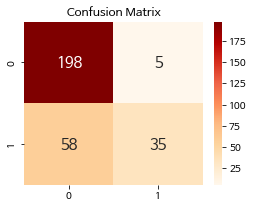

In [ ]:
# confusion matrix, 데이터 불균형에 의한 과적합 

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#sampling 재조정
df['y'].value_counts()

0    659
1    326
Name: y, dtype: int64

In [ ]:
# under-sampling 방법으로 불균현 해소
positive_random_idx = df[df['y']==1].sample(326, random_state=20).index.tolist()
negative_random_idx = df[df['y']==0].sample(326, random_state=20).index.tolist()

In [ ]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((489, 1433), (489,))

In [ ]:
x_test.shape, y_test.shape

((163, 1433), (163,))

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
# classification result for test set
a2 = accuracy_score(y_test, y_pred)
p2 = precision_score(y_test, y_pred)
r2 =recall_score(y_test, y_pred)
f2= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a2 )
print('precision: %.2f' % p2)
print('recall: %.2f' % r2)
print('F1: %.2f' % f2)

accuracy: 0.75
precision: 0.71
recall: 0.71
F1: 0.71


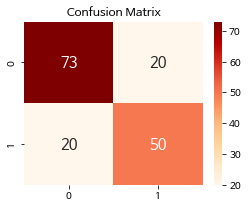

In [ ]:
# 개선된 confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 분류 정확도 test_result 
pd.options.display.float_format = '{:.2f}'.format
tr1 = pd.DataFrame([a1,p1,r1,f1])
tr2 = pd.DataFrame([a2,p2,r2,f2])

test_result = pd.concat([tr1.T, tr2.T], axis=0)
test_result.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
test_result.index = ['1차 Imbalance Data', '2차 Under-sampling']
test_result

,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
1차 Imbalance Data,0.79,0.88,0.38,0.53
2차 Under-sampling,0.75,0.71,0.71,0.71


### 분류분석 - 긍정 / 부정 키워드 분석

In [ ]:
# 긍정/부정 키워드 추출 긍 / 부정 키워드를 추출 coeficient를 시각화
lr2.coef_

array([[ 0.48070486, -0.27701783, -0.14525338, ...,  0.        ,
         0.        ,  0.        ]])

<BarContainer object of 1433 artists>

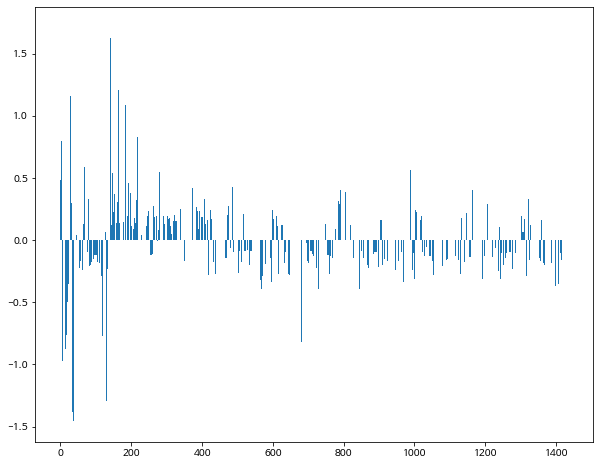

In [ ]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(1.7158238660781104, 49), (1.6250559945488985, 141), (1.4199257330378887, 129), (1.3224785902049012, 152), (1.2052613420948128, 164)]
[(-1.039687490243114, 132), (-1.291289013777571, 130), (-1.3804279046298855, 34), (-1.4530667506892412, 37), (-1.4635301921148622, 35)]


In [ ]:
# 일부 중요 원소들 단어사전 확인
print('긍정리뷰 키워드: ', id_to_word[79],id_to_word[92]) 
print('부정리뷰 키워드: ', id_to_word[416],id_to_word[513]) 

긍정리뷰 키워드:  형님 패인
부정리뷰 키워드:  지난 잔인


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.7158238660781104, 49),
 (1.6250559945488985, 141),
 (1.4199257330378887, 129),
 (1.3224785902049012, 152),
 (1.2052613420948128, 164),
 (1.1616970113249394, 28),
 (1.158896667984765, 72),
 (1.0830880763815978, 184),
 (1.0667502762358936, 139),
 (0.9517942219151959, 77),
 (0.8812219622635522, 185),
 (0.8796050846676868, 142),
 (0.8548098892318623, 43),
 (0.8320675920234011, 218),
 (0.7985559313128835, 3),
 (0.7967314477384448, 159),
 (0.7129729647824258, 177),
 (0.6892374795552454, 194),
 (0.6336604479869081, 293),
 (0.6219755556198608, 143),
 (0.5906354166861623, 68),
 (0.5658123331275912, 989),
 (0.5624814004037421, 205),
 (0.5511233013748128, 280),
 (0.5413436613347413, 147),
 (0.5067411446288062, 747),
 (0.5053539042489503, 171),
 (0.48414849899975243, 409),
 (0.4807048605230401, 0),
 (0.4783109182551918, 26),
 (0.45517016859685877, 192),
 (0.44746435720290845, 340),
 (0.432994061716448, 220),
 (0.4299063604415166, 486),
 (0.4242443443149348, 316),
 (0.41579033993160486, 148),
 

In [ ]:
#  index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력
invert_index_vectorizer = id_to_word

In [ ]:
#긍정
pos_top_word=[] 
pos_top_score=[]
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    pos_top_word.append(invert_index_vectorizer[coef[1]])
    pos_top_score.append(coef[0])

느와르 1.7158238660781104
최고 1.6250559945488985
간만 1.4199257330378887
대박 1.3224785902049012
극장 1.2052613420948128
연기 1.1616970113249394
기대 1.158896667984765
남자 1.0830880763815978
연기력 1.0667502762358936
강추 0.9517942219151959


In [ ]:
#부정
neg_top_word=[] 
neg_top_score=[]

for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    neg_top_word.append(invert_index_vectorizer[coef[1]])
    neg_top_score.append(coef[0])

감독 -1.4635301921148622
개연 -1.4530667506892412
스토리 -1.3804279046298855
쓰레기 -1.291289013777571
최악 -1.039687490243114
담배 -0.9742622296300723
이유 -0.9729486520734192
보지 -0.8770768406326882
사투리 -0.8730045833680102
칼질 -0.8588240193106955


# 5.위에서 분석한 결과를 Matplotlib 등으로 시각화하여 보여주고 설명하세요.

###Matplotilb을 이용한 시각화

In [ ]:
pos_top_word.reverse()
pos_top_score.reverse()
top_word=neg_top_word+ pos_top_word
top_score = neg_top_score+ pos_top_score

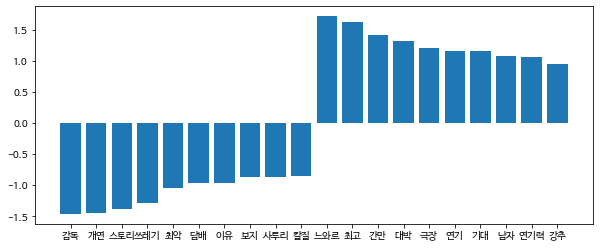

In [ ]:
plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_score)), top_score)
plt.xticks(range(len(top_word)), top_word)
plt.show()

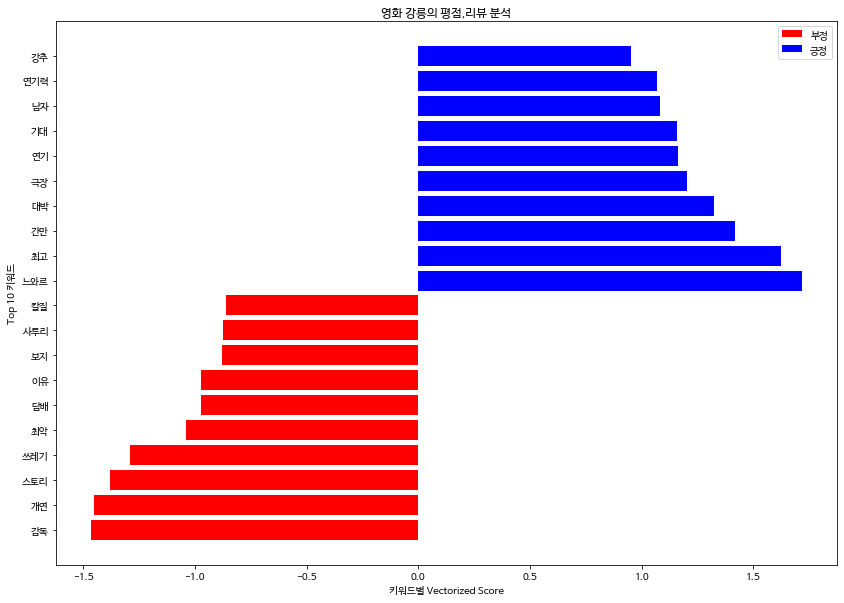

In [ ]:
# 감정분석 결과 시각화 
import matplotlib.pyplot as plt
plt.figure(figsize=[14, 10])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'b')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')
# Giving the tilte for the plot
plt.title('영화 강릉의 평점,리뷰 분석')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

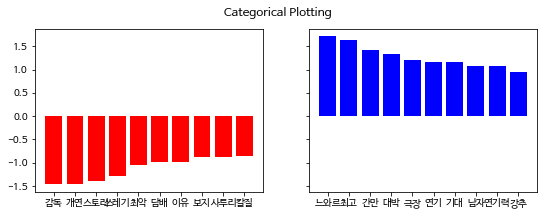

In [ ]:
# 약간 다르게 시각화 
import matplotlib.pyplot as plt

data1 = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names1 = list(data1.keys())
values1 = list(data1.values())

data2 = {'apple': 1, 'orange': 5, 'lemon': 15, 'lime': 25}
names2 = list(data2.keys())
values2 = list(data2.values())

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(neg_top_word, neg_top_score, label = "부정", color = 'r')
axs[1].bar(pos_top_word, pos_top_score, label = "긍정", color = 'b')
fig.suptitle('Categorical Plotting')